In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Adapted from [Source](https://github.com/hardik04021996/Human-Activity-Recognition-using-machine-learning/blob/master/RFC%2Bfor%2BHuman%2BActivity%2BRecognition.ipynb)

In [2]:
xtrain=pd.read_table('data/UCI_HAR_Dataset/train/X_train.txt',delim_whitespace=True,header=None)

In [3]:
xtest=pd.read_table('data/UCI_HAR_Dataset/test/X_test.txt',delim_whitespace=True,header=None)

In [4]:
ytrain=pd.read_table('data/UCI_HAR_Dataset/train/y_train.txt',header=None)

In [5]:
ytest=pd.read_table('data/UCI_HAR_Dataset/test/y_test.txt',header=None)

In [6]:
#converting into array
xtrain=xtrain.values 
xtest=xtest.values
ytrain=ytrain.values
ytest=ytest.values

In [7]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [8]:
knn = KNeighborsClassifier(n_neighbors = 24) #setting k= square root of 561

In [9]:
knn.fit(xtrain,ytrain.ravel())
ypred = knn.predict(xtest)

In [10]:
print(str(accuracy_score(ytest,ypred)*100) + ' %')

90.22734984730234 %


In [11]:
#Finding the optimal model by varying the no. of neighbors
scores = []
for i in range(1, 50):
    knn = KNeighborsClassifier(n_neighbors = i, n_jobs = -1)
    knn.fit(xtrain, ytrain.ravel())
    ypred = knn.predict(xtest)
    scores.append(accuracy_score(ytest,ypred))

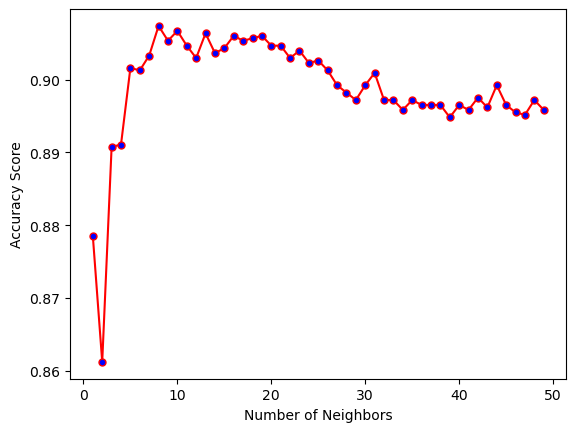

In [12]:
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy Score')
xticks = range(1,50)
plt.plot(xticks, scores, color='red', linestyle='solid', marker='o',
         markerfacecolor='blue', markersize=5)

In [13]:
import matplotlib
matplotlib.rcParams.update({'font.size': 20})

In [14]:
plt.show()

In [15]:
scores = np.array(scores)

In [17]:
#Final result after training the model
print('Optimal No. Of Neighbors: ', scores.argmax()+1)
print('Accuracy Score: '+ str(scores.max()*100)+ ' %')

Optimal No. Of Neighbors:  8
Accuracy Score: 90.73634204275535 %
